Applying CNN on fruits dataset

In [2]:
import shutil,os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
my_data_dir = '/content/drive/My Drive/fruit-360'
os.listdir(my_data_dir)

['papers', 'test-multiple_fruits', 'Test', 'Training']

In [5]:
train_path = my_data_dir+'/Training/'
test_path = my_data_dir+'/Test/'

In [6]:
classes = os.listdir(train_path)
print(classes)

['Apple Red 3', 'Apple Red 2', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apricot', 'Apple Red Yellow 2', 'Avocado', 'Avocado ripe', 'Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Fig', 'Dates', 'Eggplant', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cantaloupe 1', 'Cactus fruit', 'Carambula', 'Cantaloupe 2', 'Cherry 1', 'Cauliflower', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Corn', 'Cocos', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Kiwi', 'Grapefruit White', 'Huckleberry', 'Ginger Root', 'Kaki', 'Kohlrabi', 'Kumquats', 'Hazelnut', 'Guava', 'Granadilla', 'Grapefruit Pink', 'Grape White 4', 'Grape White 3', 'Grape White 2', 'Grape Pink', 'Grape Blue', 'Grape White', 'Onion White', 'Lemon', 'Mandarine', 'Lemon Meyer', 'Mangostan', 'Mango Red', 'Lychee', 'Limes', 'Orange', '

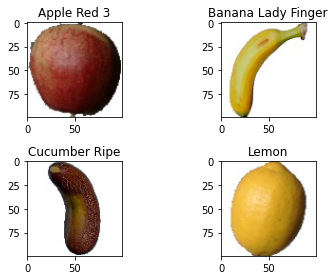

Image shape:(100, 100, 3)


In [7]:
file_name = '0_100.jpg'
width=8
height=8
rows = 2
cols = 2
axes=[]
fig=plt.figure()
i=0
for a in range(rows*cols):
    img = imread(train_path+classes[i]+'/'+file_name)
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=classes[i]
    axes[-1].set_title(subplot_title)  
    plt.imshow(img)
    i=i+20
fig.tight_layout()    
plt.show()
img_shape=img.shape
print("Image shape:"+str(img_shape))

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# help(ImageDataGenerator)

In [9]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [10]:
batch_size=512

In [11]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=img_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 67726 images belonging to 131 classes.


In [12]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=img_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False)

Found 22412 images belonging to 129 classes.


In [13]:
import tensorflow as tf

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,Conv2D,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5,5),input_shape=img_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(filters=32, kernel_size=(5,5),input_shape=img_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Conv2D(filters=64, kernel_size=(5,5),input_shape=img_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))


model.add(Flatten())


model.add(Dense(1024))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

model.add(Dense(131))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',verbose=1, patience=2)

In [ ]:
#Ignore warnings
with tf.device('/GPU:0'):
    results = model.fit(train_image_gen,validation_data=test_image_gen,callbacks=[early_stop],epochs=12
                   )

Epoch 1/12
133/133 [==============================] - 430s 3s/step - loss: 1.9765 - accuracy: 0.4752 - val_loss: 0.6007 - val_accuracy: 0.8268
Epoch 2/12
133/133 [==============================] - 300s 2s/step - loss: 0.3648 - accuracy: 0.8796 - val_loss: 0.3599 - val_accuracy: 0.9030
Epoch 3/12
133/133 [==============================] - 297s 2s/step - loss: 0.2040 - accuracy: 0.9312 - val_loss: 0.4718 - val_accuracy: 0.8784
Epoch 4/12
133/133 [==============================] - 295s 2s/step - loss: 0.1291 - accuracy: 0.9561 - val_loss: 0.2103 - val_accuracy: 0.9489
Epoch 5/12
133/133 [==============================] - 298s 2s/step - loss: 0.1015 - accuracy: 0.9657 - val_loss: 0.1785 - val_accuracy: 0.9575
Epoch 6/12
133/133 [==============================] - 301s 2s/step - loss: 0.0766 - accuracy: 0.9747 - val_loss: 0.2032 - val_accuracy: 0.9530
Epoch 7/12
133/133 [==============================] - 297s 2s/step - loss: 0.0631 - accuracy: 0.9784 - val_loss: 0.1786 - val_accuracy: 0.9609

In [ ]:
losses = pd.DataFrame(model.history.history)

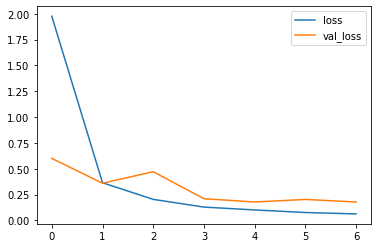

In [ ]:
losses[['loss','val_loss']].plot()

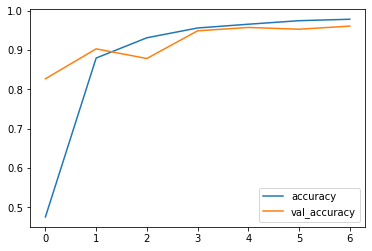

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
model.evaluate_generator(test_image_gen)
#[loss,accuracy]

[0.17831288278102875, 0.9603755474090576]

In [ ]:
model.save('Fruits_Classifier_v1.h5')